In [5]:
# !pip install pandas 安裝後還是不能使用
# 改在anaconda prompt下指令 conda install pandas

In [2]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 

In [3]:
import tensorflow as tf

In [25]:
from sklearn import datasets
iris= datasets.load_iris()
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
iris_data['target'] =iris['target']
iris_data.to_csv('iris0426.csv', encoding='utf-8', index=False)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
iris_data.info() #數據簡要

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [29]:
iris_data.head(5) #顯示前5筆

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:title={'center':'Iris Correlation'}>

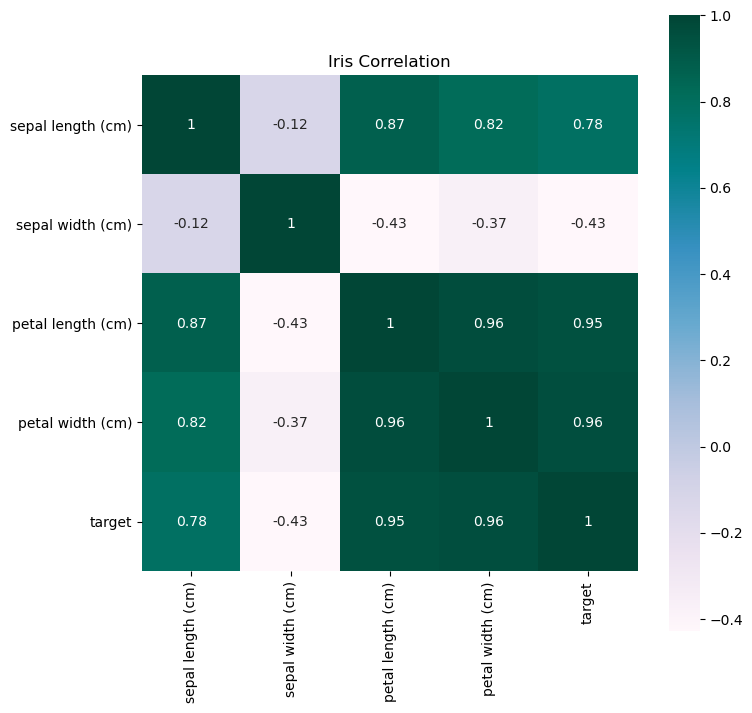

In [43]:
import seaborn as sns
plt.figure(figsize=(8, 8))
plt.title("Iris Correlation")
sns.heatmap(iris_data.astype("float").corr(), cmap="PuBuGn", square=True,annot=True)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X=iris_data.drop(['target'],axis=1)
y=iris_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)
KNN_train_accuracy = KNN.score(X_train, y_train)
KNN_test_accuracy = KNN.score(X_test, y_test)

print("M1訓練準確度:", KNN_train_accuracy)
print("M1測試準確度:", KNN_test_accuracy)

M1訓練準確度: 0.9523809523809523
M1測試準確度: 1.0


In [93]:
#交叉驗證
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN,X,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.9800000000000001


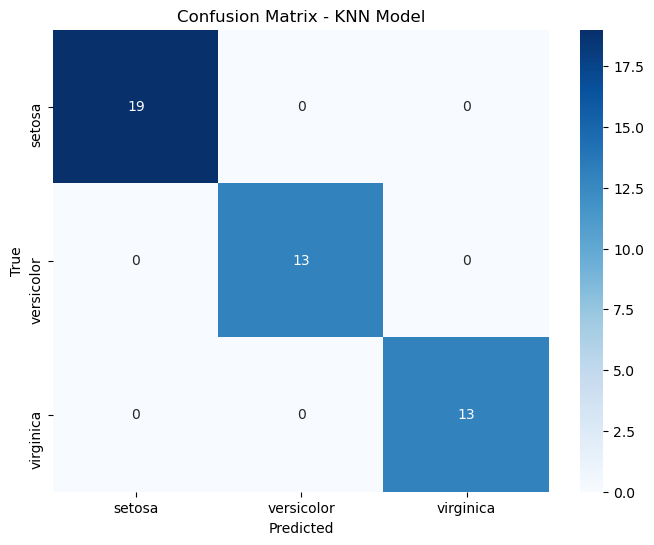

In [94]:
# KNN混淆矩陣
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# 計算混淆矩陣
KNN_cm = confusion_matrix(y_test, y_pred)

# 轉換回來
KNN_cm_df = pd.DataFrame(KNN_cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8, 6))
sns.heatmap(KNN_cm_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN Model')
plt.show()

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

